# Visualize the Extracted Features

In [8]:
import sys
sys.path.append('../')

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
cmap = sns.color_palette("coolwarm", desat=0.8)

In [9]:
DATA_DIR = Path('../data/raw/')
MODELS_DIR = Path('../models/')
RESULTS_DIR = Path('../data/features/')
PLOTS_DIR = Path('../plots/')

In [10]:
egfx_files = []

for file in os.listdir(RESULTS_DIR):
    if file.endswith('.json') and file.startswith('egfxset'):
        egfx_files.append(file)

egfx_df = {}  # Dictionary to store dataframes

for file in egfx_files:
    # Full path to the file
    file_path = RESULTS_DIR / file
    
    # Read the content of the file into a DataFrame using lines=True
    df = pd.read_json(file_path, lines=True)
    
    # Store the DataFrame in the dictionary
    # Use the file name (without extension) as the key
    key = file.split('.')[0]  # This removes the '.json' extension
    egfx_df[key] = df

# Now you can access each DataFrame using the filename (without extension) as the key
egfx_df['egfxset_y_valid'].head()

,idx,gain,leq,loudness,zcr,pitch,confidence,flatness,hfc
0,0,[-9.15533638],[-22.311126709],[2.2360777855],[0.0575423874],[603.477722168],[0.9223526120000001],[0.1336411387],[23.9253883362]
1,1,[-12.6998291016],[-19.6301822662],[3.1763021946],[0.0403361879],[352.3903503418],[0.9236511588],[0.1401527673],[17.3125400543]
2,2,[-7.9767227173],[-23.3964138031],[1.7854804993000002],[0.0769219548],[570.1983642578],[0.8158583045000001],[0.0959308073],[16.251493454]
3,3,[-5.8809185028],[-24.9011993408],[1.3190802336],[0.0603848062],[227.4654693604],[0.8046967387],[0.1183165312],[5.8804588318]
4,4,[-15.9043884277],[-15.9542312622],[6.198533535],[0.015514876700000001],[279.3923950195],[0.98216784],[0.184893772],[19.1592693329]


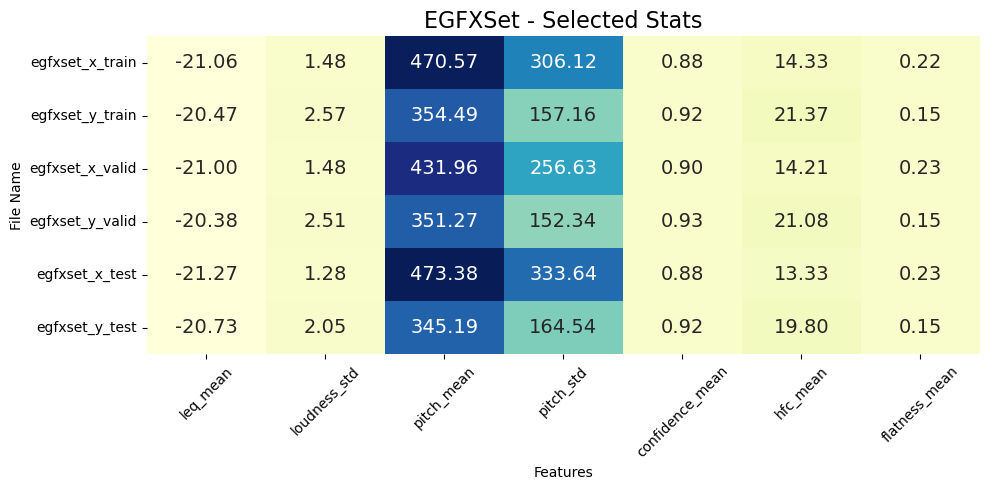

In [11]:
egfx_stats = []

for key, df in egfx_df.items():
    # Convert single-value lists into their values
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].str[0]
    
    # Create a dictionary to store computed stats for this key
    stats_dict = {}
    stats_dict['leq_mean'] = df['leq'].mean()
    stats_dict['loudness_std'] = df['loudness'].std()
    stats_dict['pitch_mean'] = df['pitch'].mean()
    stats_dict['pitch_std'] = df['pitch'].std()
    stats_dict['confidence_mean'] = df['confidence'].mean()
    stats_dict['hfc_mean'] = df['hfc'].mean()
    stats_dict['flatness_mean'] = df['flatness'].mean()
    
    # Convert to Series and name it for future concatenation
    stats_series = pd.Series(stats_dict, name=key)
    egfx_stats.append(stats_series)

# Concatenate all the series into a DataFrame
egfx_stats_df = pd.concat(egfx_stats, axis=1).T

# Specify the desired order for rows
order = [
    'egfxset_x_train',
    'egfxset_y_train',
    'egfxset_x_valid',
    'egfxset_y_valid',
    'egfxset_x_test',
    'egfxset_y_test'
]

# Reorder the rows of egfx_features_df
egfx_stats_df = egfx_stats_df.reindex(order)


plt.figure(figsize=(10, 5))
sns.heatmap(egfx_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False,  annot_kws={"size": 14})  # Use YlGnBu colormap or choose any other
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.title("EGFXSet - Selected Stats", fontsize=16)
plt.ylabel("File Name")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'egfxset-heatmap.png')
plt.show()

In [12]:
spring_files = []

for file in os.listdir(RESULTS_DIR):
    if file.endswith('.json') and file.startswith('springset'):
        spring_files.append(file)

spring_df = {}  # Dictionary to store dataframes

for file in spring_files:
    # Full path to the file
    file_path = RESULTS_DIR / file
    
    # Read the content of the file into a DataFrame using lines=True
    df = pd.read_json(file_path, lines=True)
    
    # Store the DataFrame in the dictionary
    # Use the file name (without extension) as the key
    key = file.split('.')[0]  # This removes the '.json' extension
    spring_df[key] = df

# Now you can access each DataFrame using the filename (without extension) as the key
spring_df['springset_y_valid'].head()

,idx,gain,leq,loudness,zcr,pitch,confidence,flatness,hfc
0,0,[-18.1395797729],[-15.6655235291],[6.6314949989],[0.0864715576],[519.1642456055],[0.8256336451],[0.22058893740000002],[51.7521972656]
1,1,[-12.0665874481],[-13.0704250336],[10.7041883469],[0.0231781006],[92.8837051392],[0.8769001961],[0.2984317839],[20.7034244537]
2,2,[-14.190908432],[-16.7232933044],[5.9563069344],[0.1721038818],[391.8353881836],[0.8725484014],[0.2157784104],[71.2586669922]
3,3,[-16.0097980499],[-13.0039129257],[10.0265645981],[0.0421447754],[163.4411468506],[0.8314890265],[0.2753061354],[30.2410945892]
4,4,[-11.2756919861],[-16.3107833862],[6.2009277344000004],[0.0505065918],[228.1184539795],[0.7603561282],[0.2432844341],[12.3160066605]


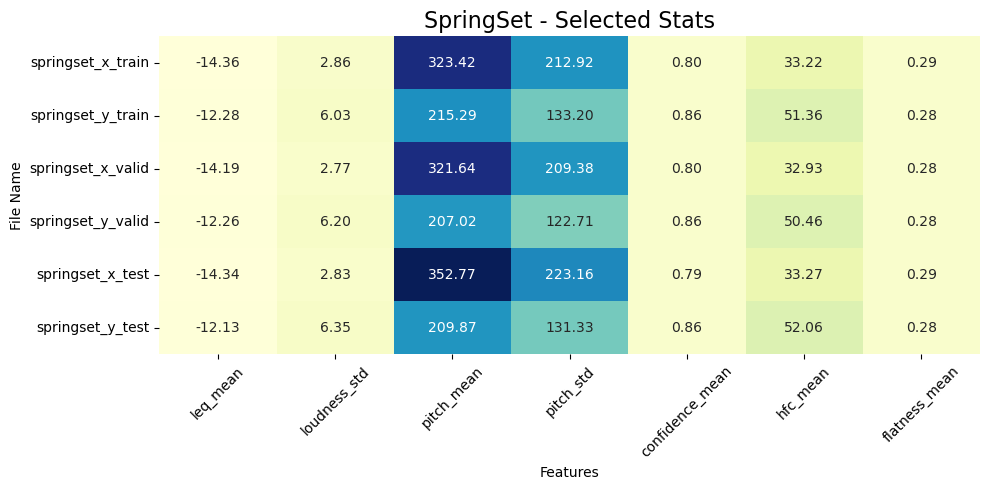

In [13]:
spring_stats = []

for key, df in spring_df.items():
    # Convert single-value lists into their values
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].str[0]
    
    # Create a dictionary to store computed stats for this key
    stats_dict = {}
    stats_dict['leq_mean'] = df['leq'].mean()
    stats_dict['loudness_std'] = df['loudness'].std()
    stats_dict['pitch_mean'] = df['pitch'].mean()
    stats_dict['pitch_std'] = df['pitch'].std()
    stats_dict['confidence_mean'] = df['confidence'].mean()
    stats_dict['hfc_mean'] = df['hfc'].mean()
    stats_dict['flatness_mean'] = df['flatness'].mean()
    
    # Convert to Series and name it for future concatenation
    stats_series = pd.Series(stats_dict, name=key)
    spring_stats.append(stats_series)

# Concatenate all the series into a DataFrame
spring_stats_df = pd.concat(spring_stats, axis=1).T

# Specify the desired order for rows
order = [
    'springset_x_train',
    'springset_y_train',
    'springset_x_valid',
    'springset_y_valid',
    'springset_x_test',
    'springset_y_test'
]

# Reorder the rows of egfx_features_df
spring_stats_df = spring_stats_df.reindex(order)


plt.figure(figsize=(10, 5))
sns.heatmap(spring_stats_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, annot_kws={"size": 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.title("SpringSet - Selected Stats", fontsize=16)
plt.ylabel("File Name")
plt.xlabel("Features")
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'springset-heatmap.png')
plt.show()

In [14]:
# Step 1: Reading the Data
egfxset_df = pd.read_csv(RESULTS_DIR / 'egfxset_dc_snr.csv')

# Compute and Print Statistics
for label in ['dry_DC', 'wet_DC', 'SNR']:
    print(f"---- {label} ----")
    print(f"Mean: {egfxset_df[label].mean()}")
    print(f"Standard Deviation: {egfxset_df[label].std()}")
    print(f"Minimum: {egfxset_df[label].min()}")
    print(f"Maximum: {egfxset_df[label].max()}")
    print()

---- dry_DC ----
Mean: -1.7797518339847495e-11
Standard Deviation: 3.380945518293002e-10
Minimum: -1.2173627661482556e-09
Maximum: 1.5772257944135502e-09

---- wet_DC ----
Mean: -5.498233633120977e-11
Standard Deviation: 4.996805305924284e-10
Minimum: -2.714494851119298e-09
Maximum: 2.086659289801673e-09

---- SNR ----
Mean: 0.8911948150685192
Standard Deviation: 2.6229305621475496
Minimum: -6.68928861618042
Maximum: 8.670418739318848



In [15]:
# Step 1: Reading the Data
springset_df = pd.read_csv(RESULTS_DIR / 'springset_dc_snr.csv')

# Compute and Print Statistics
for label in ['dry_DC', 'wet_DC', 'SNR']:
    print(f"---- {label} ----")
    print(f"Mean: {springset_df[label].mean()}")
    print(f"Standard Deviation: {springset_df[label].std()}")
    print(f"Minimum: {springset_df[label].min()}")
    print(f"Maximum: {springset_df[label].max()}")
    print()

---- dry_DC ----
Mean: -5.6493440923512734e-11
Standard Deviation: 1.2172377126212344e-09
Minimum: -4.401896180894482e-09
Maximum: 4.833098365963906e-09

---- wet_DC ----
Mean: 6.452703205144865e-11
Standard Deviation: 2.0582327612799893e-09
Minimum: -7.433118121014104e-09
Maximum: 8.313916666224941e-09

---- SNR ----
Mean: -0.7716651452359131
Standard Deviation: 2.2789845067908843
Minimum: -7.2709150314331055
Maximum: 6.872478008270264



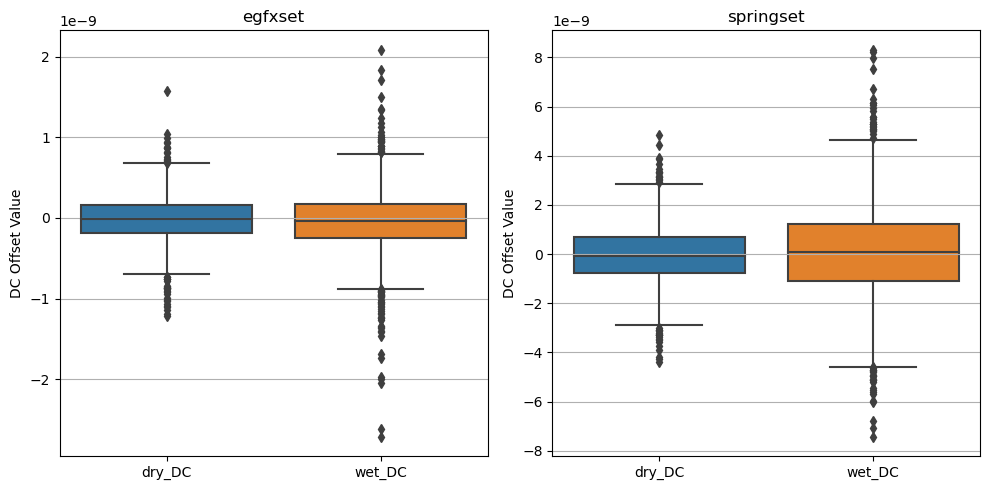

In [18]:
plt.figure(figsize=(10,5))

# egfxset boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=egfxset_df[['dry_DC', 'wet_DC']])
plt.title('egfxset')
plt.ylabel('DC Offset Value')
plt.grid(axis='y')

# springset boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=springset_df[['dry_DC', 'wet_DC']])
plt.title('springset')
plt.ylabel('DC Offset Value')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

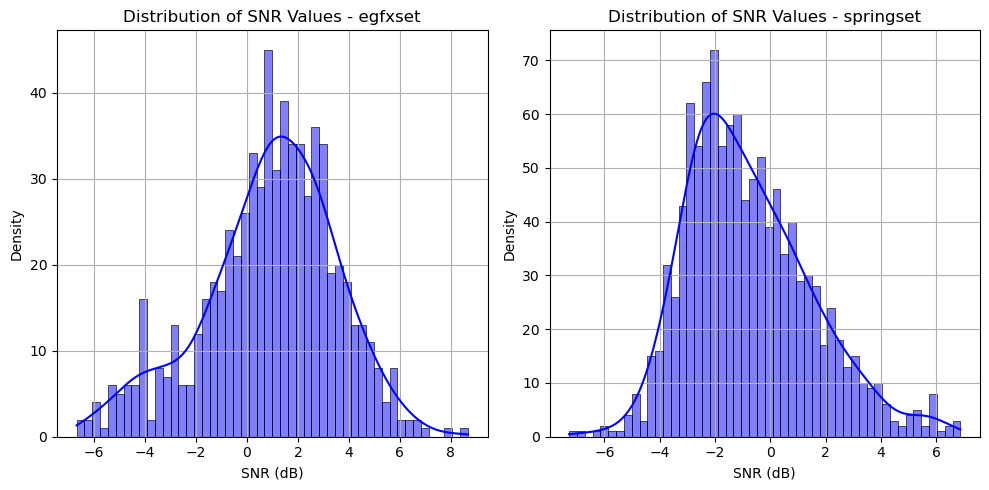

In [19]:
plt.figure(figsize=(10,5))

# egfxset SNR distribution
plt.subplot(1, 2, 1)
sns.histplot(egfxset_df['SNR'], bins=50, kde=True, color='blue')
plt.title('Distribution of SNR Values - egfxset')
plt.xlabel('SNR (dB)')
plt.ylabel('Density')
plt.grid(True)

# springset SNR distribution
plt.subplot(1, 2, 2)
sns.histplot(springset_df['SNR'], bins=50, kde=True, color='blue')
plt.title('Distribution of SNR Values - springset')
plt.xlabel('SNR (dB)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()